<a href="https://colab.research.google.com/github/ddy623/Prediction-of-Product-Sales/blob/main/Copy_of_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Deidre Hunt

## Project Overview

## **Project 1, Part 2**

## Load and Inspect Data

In [ ]:
#import pandas
import pandas as pd
#save file path
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load in the data as a pandas dataframe
df = pd.read_csv(fname)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

How many rows?

In [ ]:
len(df)

8523

How many columns?

In [ ]:
len(df.columns)

12

What are the datatypes of each variable?

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Are there any duplicates? If so, drop any duplicates

In [ ]:
# save the filter
duplicated_rows = df.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

4) Identify Missing Values

In [ ]:
# This will give us the total number of null values (True) for each column
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


5)Address the missing values by using a placeholder

In [ ]:
# Saving list of column names for object cols
cat_cols = df.select_dtypes('object').columns
cat_cols



Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Saving list of column names for numeric cols
num_cols = df.select_dtypes('number').columns
num_cols



Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# Checking which categorical columns had missing values.
df[cat_cols].isna().sum()



Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [ ]:
df['Outlet_Size'] = df['Outlet_Size'].fillna("Missing")
df['Outlet_Size'].value_counts(dropna=False)

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [ ]:
# Filling null values with -1
df['Item_Weight']  = df['Item_Weight'].fillna(-1)
df['Item_Weight'].isna().sum()



0

In [ ]:
# Filling null values with -1
df['Outlet_Size']  = df['Outlet_Size'].fillna(-1)
df['Outlet_Size'].isna().sum()

0

6) Confirm that there are no missing values after addressing them

In [ ]:
df['Item_Weight'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [ ]:
df['Item_Weight'].dtype

dtype('float64')

In [ ]:
df['Outlet_Size'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [ ]:
df['Outlet_Size'].dtype

dtype('O')

In [ ]:
#Confirm there is not anymore missing data after addressing them
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

There are no more missing values.

7)  Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [ ]:
# Identify string columns
string_cols = df.select_dtypes("object").columns
string_cols



Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Explore the value counts of one feature
df['Item_Fat_Content'].value_counts()



Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content'].replace()

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [ ]:
#Correct inconsistency with Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': "Low Fat", 'low fat': "Low Fat"})
df['Item_Fat_Content'].value_counts()

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'reg': "Regular"})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# **Project 1, Part 3**

## Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [ ]:
# Take a look at the Item_Type column
df['Item_Type'].head()

0                    Dairy
1              Soft Drinks
2                     Meat
3    Fruits and Vegetables
4                Household
Name: Item_Type, dtype: object

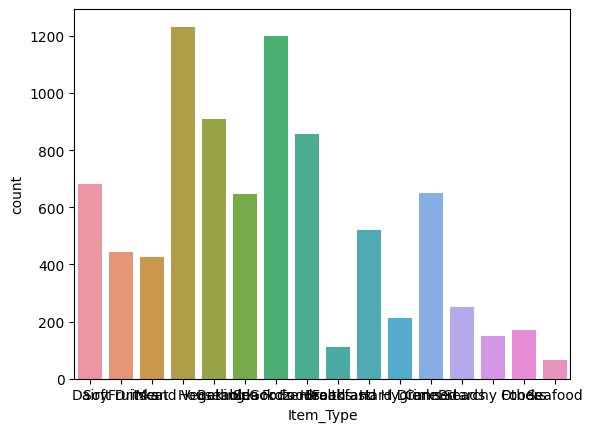

In [ ]:
#Create a countplot for categorical data
# Seaborn countplot
ax = sns.countplot(data=df, x="Item_Type")


The data shows that Item_Type has variation across the data.  Some items sold more than others.

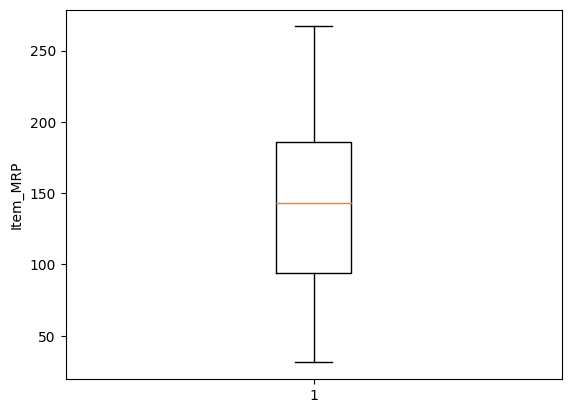

In [ ]:
# create boxplot for numerical feature of dataset
fig, ax = plt.subplots()
data = df['Item_MRP']
ax.boxplot(data);
ax.set_ylabel('Item_MRP');



Item_MRP is about 300.

<Axes: >

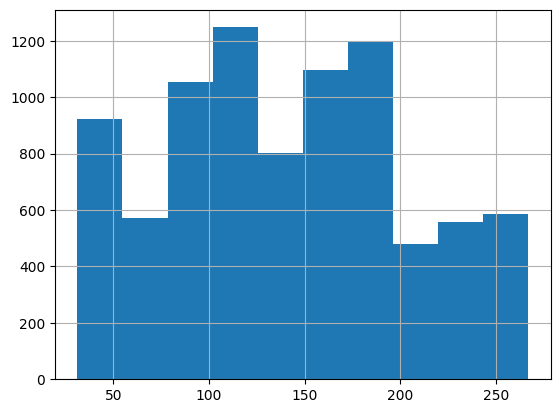

In [ ]:
# Make a default histogram of the Item_MRP column
df['Item_MRP'].hist()


When it comes to Item_MRP, the data shows variations, as the data is not consistent across the graph.

In [ ]:
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)







,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


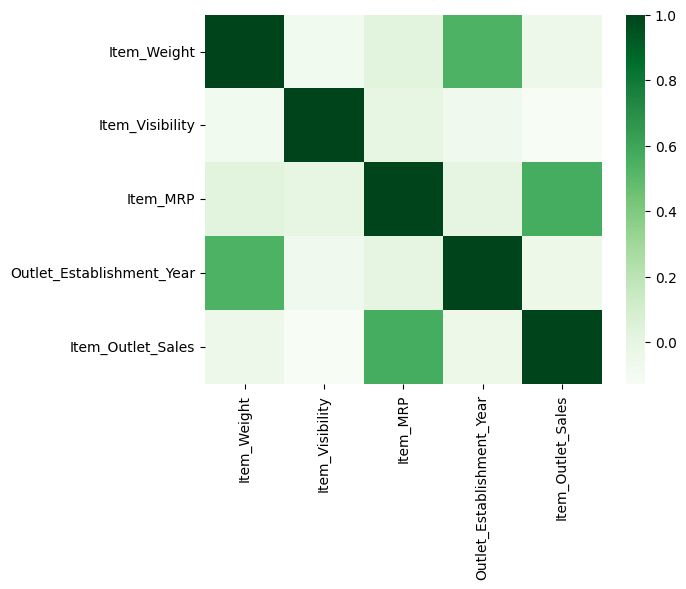

In [ ]:
# Make a heatmap of correlations
sns.heatmap(corr, cmap = 'Greens');



The data shows a positive correlation, as indicated with the dark green color on the dataset.

# **Project 1,  Part 4**

## Feature Inspection

In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


*   What type of feature is it? (Categorical (nominal), ordinal, numeric)
The feature is categorical

*   How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

There are 4,061 missing values.  The percentage is 17.16% Item_Weight and for Outlet_Size, there is a percentage of 28.28%.

*   Is the feature constant or quasi-constant?
The feature is constant

*   Would we know this feature before the target is determined?
No


* Is there a business case/understanding reason to exclude based on our business case?






In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

Variable Name	Description
Item_Identifier	Product ID
Item_Weight	Weight of product
Item_Fat_Content	Whether the product is low-fat or regular
Item_Visibility	The percentage of total display area of all products in a store allocated to the particular product
Item_Type	The category to which the product belongs
Item_MRP	Maximum Retail Price (list price) of the product
Outlet_Identifier	Store ID
Outlet_Establishment_Year	The year in which store was established
Outlet_Size	The size of the store in terms of ground area covered
Outlet_Location_Type	The type of area in which the store is located
Outlet_Type	Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales	Sales of the product in the particular store. This is the target variable to be predicted.

Answer the following questions:
Define your target column:
...
The target column is  Item_Outlet_Sales

Is this a classification or regression task?
...

 Feature Name:


*   Item_Identifier
*   Item_Weight
*   Item_Fat_Content
*   Item_Visibility
*   Item_Type
*   Item_MRP
*   Outlet_Identifier
*   Outlet_Establishment_Year
*   Outlet_Size
*   Outlet_Location_Type
*   Outlet_Type













In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = "Item_Identifier"
# df[feature].dtype
df['Item_Identifier'].dtype

dtype('O')

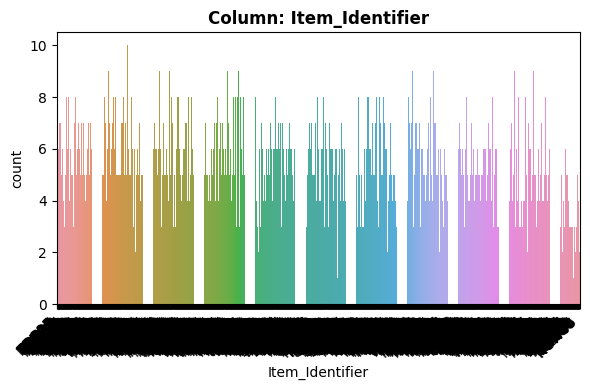

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,'Item_Identifier');

# **Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    Item_Identifier is a numerical.


2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

    There no null values.

3. Is the feature constant or quasi-constant?

   The feature is not constance or quasi-constant

4. What is the cardinality? Is it high?

*   1559 unique values
*   High cardinality


5. Would we know this BEFORE the target is determined?
   
   Yes.

6.  Is there a business case/understanding reason to exclude based on our
    business case?
    
    No.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Identifier vs. Item_Outlet_Sales'}, xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>)

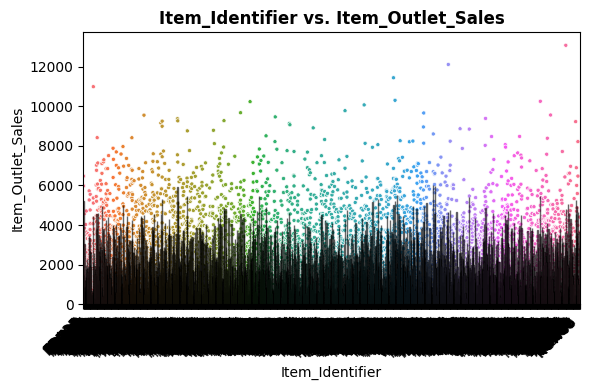

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,'Item_Identifier','Item_Outlet_Sales')

# **Feature vs. Target Observations:**



* Based on your business understanding, would you expect this feature to be a
   predictor of the target?  No


* Does this feature appear to be a predictor of the target?

  People will identify items that they want and purchase them. There isn't much of a difference with sales

In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = "Item_Weight"
# df[feature].dtype
df['Item_Weight'].dtype

dtype('float64')

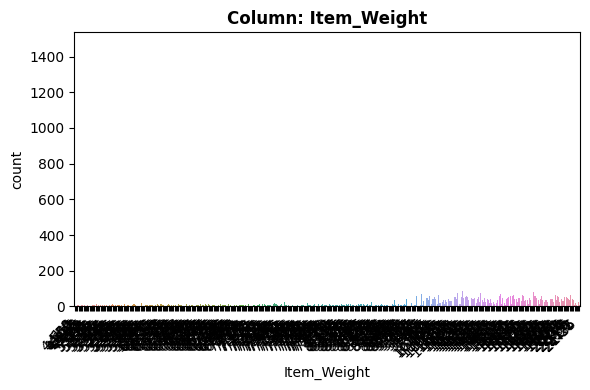

- NaN's Found: 0 (0.0%)
- Unique Values: 416
- Most common value: '-1.0' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,'Item_Weight');

# **Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    Item_Weight is a numerical feature


2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

    There are no null values.

3. Is the feature constant or quasi-constant?

   The feature is not constance or quasi-constant

4. What is the cardinality? Is it high?

*   416 unique values
*   High cardinality


5. Would we know this BEFORE the target is determined?
   
   Yes.

6.  Is there a business case/understanding reason to exclude based on our
    business case?
    
    No.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

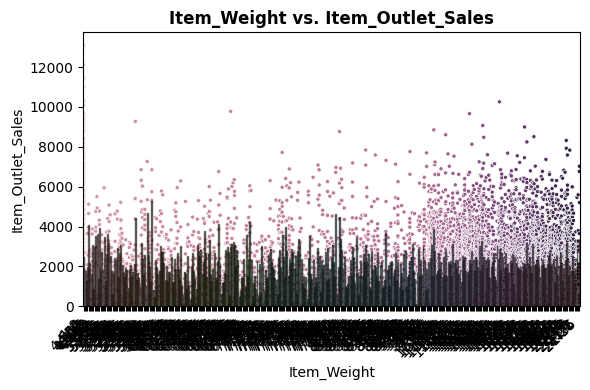

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,'Item_Weight','Item_Outlet_Sales')

# **Feature vs. Target Observations:**



*   Based on your business understanding, would you expect this feature to be a
    predictor of the target?
    
    No
*   Does this feature appear to be a predictor of the target?

    No, there doesn't appear to be a relationship with item weight and outlet sales.





In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = "Item_Fat_Content"
# df[feature].dtype
df['Item_Fat_Content'].dtype

dtype('O')

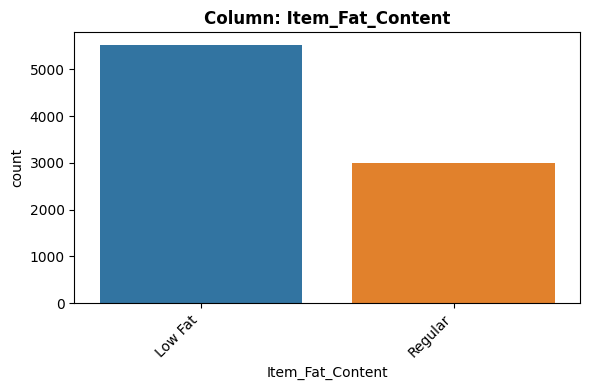

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,'Item_Fat_Content');

# **Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    Item_Fat is a nominal

2.  How many null values? What percentage? What would you do with the null
    values (drop the rows? drop the column? impute? if impute, with what?)

    There are no null values.

3. Is the feature constant or quasi-constant?

   The feature is not constance or quasi-constant

4. What is the cardinality? Is it high?
   2 unique values
   Low cardinality

5. Would we know this BEFORE the target is determined?

   Yes.

6. Is there a business case/understanding reason to exclude based on our
   business case?

   No.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

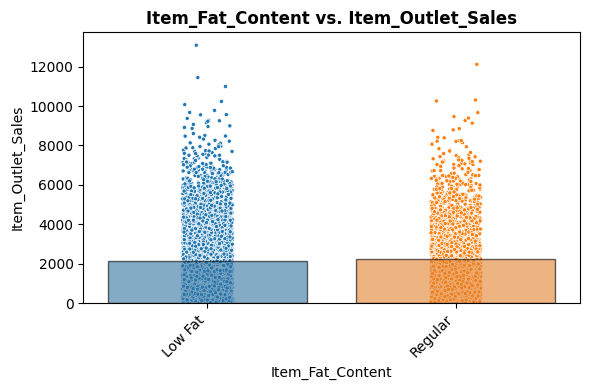

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,'Item_Fat_Content','Item_Outlet_Sales')

# **Feature vs. Target Observations:**

  - Based on your business understanding, would you expect this feature to be a
    predictor of the target?
    
    Yes.
  - Does this feature appear to be a predictor of the target?
    There is not much of a difference. I would assume that people will purchase items that are low fat as well as regular.




In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = "Item_Visibility"
# df[feature].dtype
df['Item_Visibility'].dtype

dtype('float64')

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

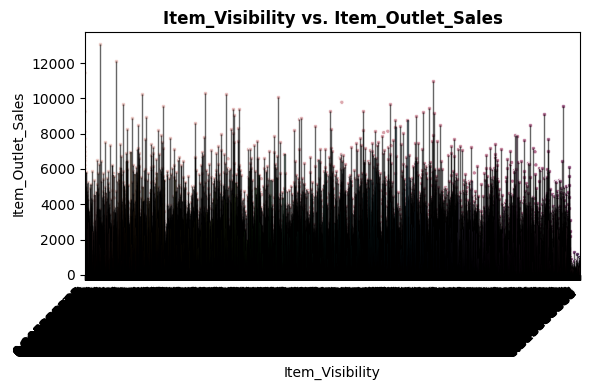

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,'Item_Visibility','Item_Outlet_Sales')

# **Feature Observations**
1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

   Item_Visibility is a numerical

2. How many null values? What percentage? What would you do with the null
   values (drop the rows? drop the column? impute? if impute, with what?)

  There are no null values.

3. Is the feature constant or quasi-constant?

   The feature is not constance or quasi-constant

4. What is the cardinality? Is it high?
  
  There is no cardinality.

5. Would we know this BEFORE the target is determined?

   Yes.

6. Is there a business case/understanding reason to exclude based on our
   business case?

   No.



Feature vs. Target Observations:
-Based on your business understanding, would you expect this feature to be a predictor of the target?

-Does this feature appear to be a predictor of the target?

No


In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = "Item_Type"
# df[feature].dtype
df['Item_Type'].dtype

dtype('O')

# **Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    It is categorical

2. How many null values? What percentage? What would you do with the null
   values (drop the rows? drop the column? impute? if impute, with what?)

   There are no null values.

3. Is the feature constant or quasi-constant?

   The feature is not constant

4. What is the cardinality? Is it high?
   
   There is no cardinality in the dataset

5. Would we know this BEFORE the target is determined?

   Yes.

6. Is there a business case/understanding reason to exclude based on our business case?

   No.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

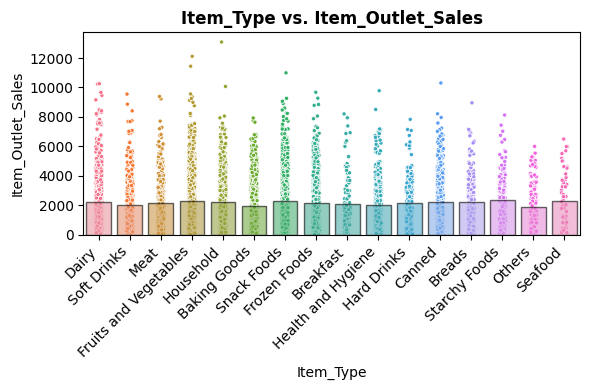

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,'Item_Type','Item_Outlet_Sales')

**Feature vs. Target Observations:**

- Based on your business understanding, would you expect this feature to be a
  predictor of the target?

  No

- Does this feature appear to be a predictor of the target?

  There is not much of a difference among item type and outlet sales. It appears that consumer's are purchasing a variety of items.

In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = "Item_MRP"
# df[feature].dtype
df['Item_MRP'].dtype

dtype('float64')

# **Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

   It is numerical

2. How many null values? What percentage? What would you do with the null
   values (drop the rows? drop the column? impute? if impute, with what?)

   There are no null values.

3. Is the feature constant or quasi-constant?

   The feature is not constant

4. What is the cardinality? Is it high?

   There is no cardinality in the dataset

5.  Would we know this BEFORE the target is determined?

    Yes.
    
6. Is there a business case/understanding reason to exclude based on our
   business case?

   No.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

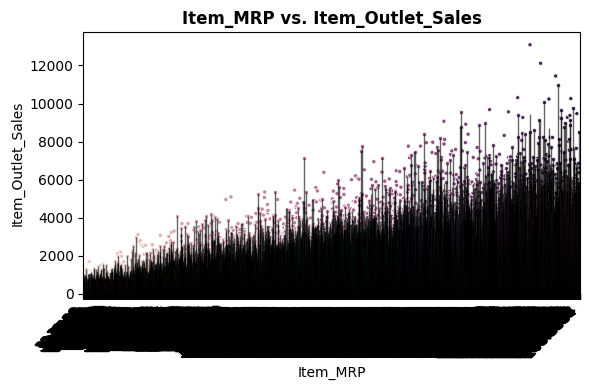

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,'Item_MRP','Item_Outlet_Sales')

# **Feature vs. Target Observations:**

-Based on your business understanding, would you expect this feature to be a predictor of the target?

   Yes

-Does this feature appear to be a predictor of the target?

   Item MRP appears to be steady

In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = "Outlet_Identifier"
# df[feature].dtype
df['Outlet_Identifier'].dtype

dtype('O')

Feature Observations

1.  What type of feature is it? (Categorical (nominal), ordinal, numeric)

It is categorical

2.  How many null values? What percentage? What would you do with the null
    values (drop the rows? drop the column? impute? if impute, with what?)

     There no null values.

3.  Is the feature constant or quasi-constant?

    The feature is constant

4.  What is the cardinality? Is it high? There is no cardinality in the dataset

5.  Would we know this BEFORE the target is determined?

      Yes.
6. Is there a business case/understanding reason to exclude based on our business case?

  No.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Identifier vs. Item_Outlet_Sales'}, xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>)

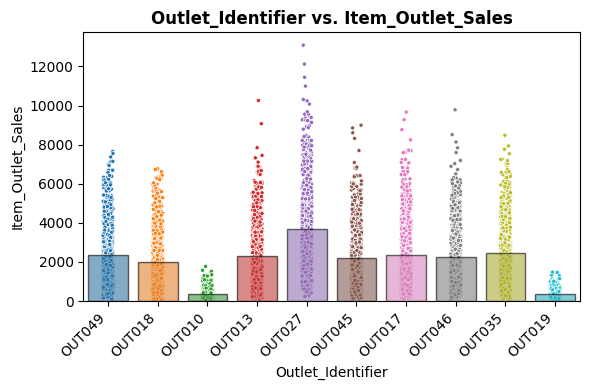

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,'Outlet_Identifier','Item_Outlet_Sales')

Feature vs. Target Observations:

Based on your business understanding, would you expect this feature to be a predictor of the target? ...? Does this feature appear to be a predictor of the target? ... There appear to be some changes but not much of a significant relationship between outlet sales and outlet identifier.

In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = "Outlet_Establishment_Year"
# df[feature].dtype
df['Outlet_Establishment_Year'].dtype

dtype('int64')

Feature Observations

1.  What type of feature is it? (Categorical (nominal), ordinal, numeric)

    It is numerical

2.  How many null values? What percentage? What would you do with the null
    values (drop the rows? drop the column? impute? if impute, with what?)

    There are no null values.

3.  Is the feature constant or quasi-constant?

     The feature is not constant

4.  What is the cardinality? Is it high? There is no cardinality in the dataset

5.  Would we know this BEFORE the target is determined?

    Yes.
6. Is there a business case/understanding reason to exclude based on our
   business case?

  No.

In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = "Outlet_Size"
# df[feature].dtype
df['Outlet_Size'].dtype

dtype('O')

# **Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

  It is numerical

2.  How many null values? What percentage? What would you do with the null
    values (drop the rows? drop the column? impute? if impute, with what?)

     There are no null values.

3. Is the feature constant or quasi-constant?

4. The feature is constant

  What is the cardinality? Is it high? There is no cardinality in the dataset

5. Would we know this BEFORE the target is determined?

  Yes.

6. Is there a business case/understanding reason to exclude based on our
  business case?

  No.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)

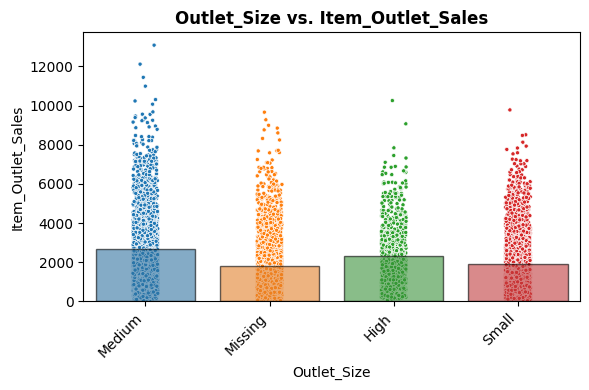

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,'Outlet_Size','Item_Outlet_Sales')

# **Feature vs. Target Observations:**

-Based on your business understanding, would you expect this feature to be a predictor of the target?

  Yes

-Does this feature appear to be a predictor of the target?

   Yes, I would predict that there would not be a big change based upon outlet size and sales.

In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = "Outlet_Location_Type"
# df[feature].dtype
df['Outlet_Location_Type'].dtype

dtype('O')

# **Feature Observations**

1.  What type of feature is it? (Categorical (nominal), ordinal, numeric)

   It is categorical

2.  How many null values? What percentage? What would you do with the null
    values (drop the rows? drop the column? impute? if impute, with what?)

     There are no null values.

3. Is the feature constant or quasi-constant?

    The feature is not constant

4. What is the cardinality? Is it high?

   There is no cardinality in the dataset

5. Would we know this BEFORE the target is determined?

   Yes.

6. Is there a business case/understanding reason to exclude based on our
   business case?

   No.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)

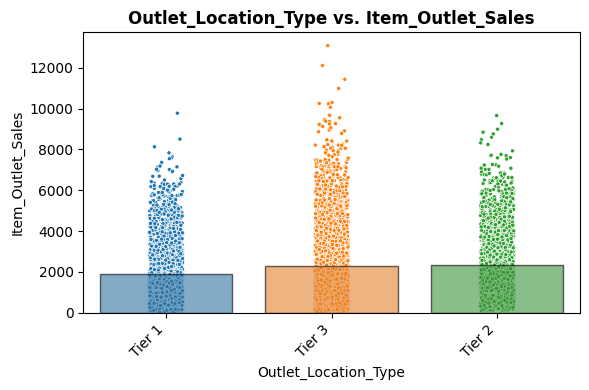

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,'Outlet_Location_Type','Item_Outlet_Sales')

# **Feature vs. Target Observations:**

-Based on your business understanding, would you expect this feature to be a predictor of the target?

  Yes

-Does this feature appear to be a predictor of the target?  

  Yes, I did not think there would be much of change based upon the location of the item.

In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = "Outlet_Type"
# df[feature].dtype
df['Outlet_Type'].dtype

dtype('O')

# **Feature Observations**

1.  What type of feature is it? (Categorical (nominal), ordinal, numeric)

    It is categorical

2. How many null values? What percentage? What would you do with the null
  values (drop the rows? drop the column? impute? if impute, with what?)

   There are no null values.

3. Is the feature constant or quasi-constant?

   The feature is constant

4. What is the cardinality? Is it high?

   There is no cardinality in the dataset

5. Would we know this BEFORE the target is determined?

  Yes.

6. Is there a business case/understanding reason to exclude based on our
   business case?

     No.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)

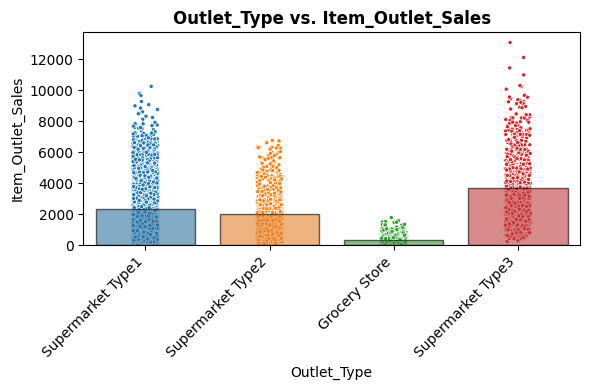

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,'Outlet_Type','Item_Outlet_Sales')

# **Feature vs. Target Observations:**

-Based on your business understanding, would you expect this feature to be a predictor of the target?

Yes

-Does this feature appear to be a predictor of the target?

  Yes, I would predict for that sales will vary based upon the store.

**Project 1-Part 5**

The goal of this step is to help the retailer by using machine learning to make predictions about future sales based on the data provided.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
## Numpy
import numpy as np
## Pandas
import pandas as pd
## MatPlotlib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

In [7]:
### LOAD DATASET FROM GOOGLE DRIVE OR URL
# load data
fpath = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Ensure that there are no duplicates in the data

In [9]:
# save the filter
duplicated_rows = df.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [10]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

Perform Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')

In [12]:
# Define features (X) and target (y).
X = df.drop(columns='Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

In [19]:
#Drop Item_Identifier from dataset due to high cardinality
df = df.drop(columns=['Item_Identifier'])

In [20]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NCG06,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,FDV57,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,FDM27,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,FDG24,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,FDD05,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


Define Groups

In [21]:
#Create a preprocessing object to prepare the dataset for Machine Learning
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [23]:
numeric_cols = X_train.select_dtypes('number').columns
numeric_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [25]:
categorical_cols = X_train.select_dtypes('object').drop(columns='Item_Type').columns
categorical_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Impute Numeric Values

In [ ]:
from sklearn.impute import SimpleImputer

In [26]:
# Instantaite and fit the imputer for numeric features
impute_median = SimpleImputer(strategy='median')
impute_median.fit(X_train[numeric_cols])

SimpleImputer(strategy='median')

In [27]:
# Transform the training and test numeric features and save as new vars
X_train_num_imputed = impute_median.transform(X_train[numeric_cols])
X_test_num_imputed = impute_median.transform(X_test[numeric_cols])

# confirm no null values remaining
X_train_num_imputed.isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

Impute Categorical Values

In [28]:
# Instantaite and fit the imputer for categorical features
impute_missing = SimpleImputer(strategy='constant', fill_value='MISSING')
impute_missing.fit(X_train[categorical_cols])

SimpleImputer(fill_value='MISSING', strategy='constant')

In [29]:
# Transform the training and test categorical features and save as new vars
X_train_cat_imputed = impute_missing.transform(X_train[categorical_cols])
X_test_cat_imputed = impute_missing.transform(X_test[categorical_cols])

# confirm no null values remaining
X_train_cat_imputed.isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64